<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Gen AI Experiments](https://img.shields.io/badge/Gen%20AI%20Experiments-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://github.com/buildfastwithai/gen-ai-experiments)
[![Gen AI Experiments GitHub](https://img.shields.io/github/stars/buildfastwithai/gen-ai-experiments?style=for-the-badge&logo=github&color=gold)](http://github.com/buildfastwithai/gen-ai-experiments)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yaUZX6SQ4050dAe6ijtLhn8dpcRUMgq5?usp=sharing)






## Master Generative AI in 8 Weeks
**What You'll Learn:**
- Master cutting-edge AI tools & frameworks
- 6 weeks of hands-on, project-based learning
- Weekly live mentorship sessions

[Start Your Journey](https://www.buildfastwithai.com/genai-course)


# **Testing Horizon Beta With Educhain**
####**Educhain 🎓🔗** :
 A powerful Python package that leverages Generative AI to create engaging and personalized educational content.

####**Horizon Beta** :
AI model with a massive 256K context window , multimodal capabilities for both text and image processing, and inference speeds that make real-time applications actually feasible.


## **Setting Up Educhain Using Horizon Beta Model**

### **Installations**

In [ ]:
!pip install openai educhain langchain-openai

In [ ]:
import os
from educhain import Educhain, LLMConfig
from langchain_openai import ChatOpenAI
from google.colab import userdata
from PIL import Image
import matplotlib.pyplot as plt
import textwrap
from pprint import pprint

### **Get API Key**
 You will need an API key from [OpenRouter](https://openrouter.ai/) to run the examples.

In [ ]:
os.environ["OPENROUTER_API_KEY"]= userdata.get('OPENROUTER_API_KEY')

### **Configure Educhain To Use Horizon Beta**

In [ ]:
horizon_alpha = ChatOpenAI(
    openai_api_base="https://openrouter.ai/api/v1",
    openai_api_key=os.environ["OPENROUTER_API_KEY"],
    model_name="openrouter/horizon-beta"
)


In [ ]:
horizon_alpha_config = LLMConfig(custom_model=horizon_alpha)
client = Educhain(horizon_alpha_config)

## **Visual Reasoning Tests**
Let's test the multimodal and reasoning capabilities of Horizon Alpha using Educhain's qna_engine and solve_doubt endpoint.

#### **Tree Cutter Problem**

In [ ]:
!wget -O scene_image.jpg "https://preview.redd.it/who-is-the-most-stupid-the-title-question-to-which-the-only-v0-yiupi17you9c1.jpeg?auto=webp&s=ccb5392b1b99c8ef8d42ffc4e97179e1d6f2077a"


--2025-08-05 08:20:09--  https://preview.redd.it/who-is-the-most-stupid-the-title-question-to-which-the-only-v0-yiupi17you9c1.jpeg?auto=webp&s=ccb5392b1b99c8ef8d42ffc4e97179e1d6f2077a
Resolving preview.redd.it (preview.redd.it)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to preview.redd.it (preview.redd.it)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46208 (45K) [image/jpeg]
Saving to: ‘scene_image.jpg’

scene_image.jpg     100%[===================>]  45.12K  --.-KB/s    in 0.01s   

2025-08-05 08:20:09 (3.78 MB/s) - ‘scene_image.jpg’ saved [46208/46208]



In [ ]:
image_path = "scene_image.jpg"


logic_question = client.qna_engine.solve_doubt(
    image_source=image_path,
    prompt=(
        "There are 4 people sitting on a tree. Some are cutting branches in dangerous ways. "
        "Analyze the situation and answer: Who is the most stupid and what color shirt is he or she wearing ?"
    ),
    detail_level="Low"
)



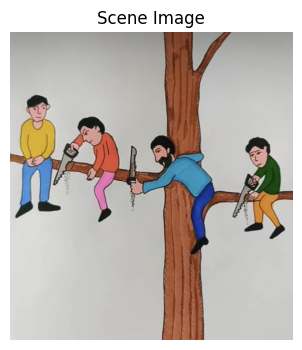

📌 Horizon Alpha's Visual Reasoning Output:

🧠 Explanation:
 The image shows four people sitting on different branches of a tree, each sawing in ways that could cause them to fall. From left to right: (1) Person in yellow shirt is just sitting, not sawing. (2) Person in orange shirt and pink pants is sawing the branch between themselves and the trunk—once cut, they will fall. (3) Person in blue shirt is sitting on a branch and sawing the same branch between themselves and the trunk—this guarantees they will fall as soon as it’s cut. (4) Person in green shirt is sawing the small branch beyond their position (away from the trunk), which is relatively safer for them. The most obviously unwise (most "stupid") is the person in the blue shirt, because they are actively cutting off the very branch that is supporting their weight on the trunk side, ensuring an immediate fall.

📌 Steps:
 - Identify each person’s position relative to the trunk and the cut line.
 - Check whether the cut is between

In [ ]:
# Load and display the image
img = Image.open("scene_image.jpg")

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis("off")
plt.title("Scene Image")
plt.show()

# model response
print("📌 Horizon Alpha's Visual Reasoning Output:\n")
print("🧠 Explanation:\n", logic_question.explanation)
print("\n📌 Steps:")
for step in logic_question.steps:
    print(" -", step)
print("\n📝 Additional Notes:\n", logic_question.additional_notes)


#### **Maze Problem**

In [ ]:
!wget -O maze_image.jpg "https://media.istockphoto.com/id/1381031243/vector/maze-game.jpg?s=2048x2048&w=is&k=20&c=9AgdlTqAQZpGYh2wX8-OOcdt7fo_gbHwMDbXGq3Lam4="


--2025-08-05 08:20:19--  https://media.istockphoto.com/id/1381031243/vector/maze-game.jpg?s=2048x2048&w=is&k=20&c=9AgdlTqAQZpGYh2wX8-OOcdt7fo_gbHwMDbXGq3Lam4=
Resolving media.istockphoto.com (media.istockphoto.com)... 3.170.152.114, 3.170.152.26, 3.170.152.67, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|3.170.152.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269760 (263K) [image/jpeg]
Saving to: ‘maze_image.jpg’

maze_image.jpg      100%[===================>] 263.44K  --.-KB/s    in 0.04s   

2025-08-05 08:20:20 (5.84 MB/s) - ‘maze_image.jpg’ saved [269760/269760]



In [ ]:
maze_path = "maze_image.jpg"
maze_explanation = client.qna_engine.solve_doubt(
    image_source=maze_path ,
    prompt="Which path out of 1 , 2 or 3 should the girl take to reach the fruits",
    detail_level="High"
)

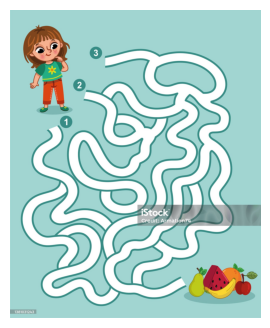

📌 Horizon Alpha's Visual Reasoning Output:

🧠 Explanation:
 We need to determine which of the three starting paths (labeled 1, 2, and 3) will lead the girl through the maze to the fruits. By visually tracing each path from its numbered starting point toward the fruits at the bottom-right, we can check for dead ends or successful connections. 

- Path 1: Tracing from the marker labeled 1 descends into the maze, winds through several turns, and continues along a route that eventually connects to the corridor leading to the fruits. It does not run into a dead end and reaches the fruit area. 
- Path 2: Tracing from the marker labeled 2 initially looks promising but soon diverts into a segment that loops and terminates away from the exit, resulting in a dead end. 
- Path 3: Tracing from the marker labeled 3 heads into upper loops that do not connect to the lower-right exit corridor and ultimately fails to reach the fruits. 

Therefore, the correct path to reach the fruits is Path 1.

📌 Step

In [ ]:
# Load and display the image
img = Image.open("maze_image.jpg")

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.show()

# model response
print("📌 Horizon Alpha's Visual Reasoning Output:\n")
print("🧠 Explanation:\n", maze_explanation.explanation)
print("\n📌 Steps:")
for step in maze_explanation.steps:
    print(" -", step)
print("\n📝 Additional Notes:\n", maze_explanation.additional_notes)


#### **Count Triangles Problem**

In [ ]:
!wget -O triangle_image.jpg "https://mindyourdecisions.com/blog/wp-content/uploads/2016/01/how-many-triangles-do-you-see-1.png"


--2025-08-05 08:20:30--  https://mindyourdecisions.com/blog/wp-content/uploads/2016/01/how-many-triangles-do-you-see-1.png
Resolving mindyourdecisions.com (mindyourdecisions.com)... 104.21.112.1, 104.21.16.1, 104.21.64.1, ...
Connecting to mindyourdecisions.com (mindyourdecisions.com)|104.21.112.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24065 (24K) [image/png]
Saving to: ‘triangle_image.jpg’

triangle_image.jpg  100%[===================>]  23.50K  --.-KB/s    in 0s      

2025-08-05 08:20:30 (66.3 MB/s) - ‘triangle_image.jpg’ saved [24065/24065]



In [ ]:
triangle_path = "triangle_image.jpg"
tri_problem = client.qna_engine.solve_doubt(
    image_source=triangle_path ,
    prompt="Count the total number of triangles in it,",
    detail_level="High"
)


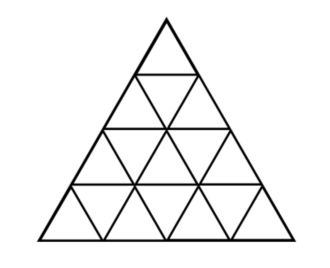

📌 Horizon Alpha's Visual Reasoning Output:

🧠 Explanation:
 We are given an equilateral triangle subdivided into smaller congruent equilateral triangles by drawing lines parallel to the sides. Visually, the big triangle is partitioned into a grid of side-length 4 small triangles (i.e., there are 4 small triangles along each edge). In such a triangular grid of order n=4, the total number of equilateral triangles of all sizes is the sum over k=1..n of the number of upright k-size triangles plus inverted k-size triangles where applicable. A well-known result for an equilateral triangle subdivided into n^2 small unit triangles (with both orientations present) gives the total number of triangles as n(n+2)(2n+1)/8 when counting only upright triangles, and additional inverted ones depending on the subdivision. However, in the standard triangular tiling formed by straight line segments parallel to the sides (as in the image), both upright and inverted triangles appear. The total count for orde

In [ ]:
# Load and display the image
img = Image.open("triangle_image.jpg")

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.show()

# model response
print("📌 Horizon Alpha's Visual Reasoning Output:\n")
print("🧠 Explanation:\n", tri_problem.explanation)
print("\n📌 Steps:")
for step in tri_problem.steps:
    print(" -", step)
print("\n📝 Additional Notes:\n", tri_problem.additional_notes)

## **Generating Lesson Plan**

In [ ]:
lesson = client.content_engine.generate_lesson_plan(
    topic="Model Context Protocol",
    duration="1 minutes",
    learning_objectives=["Understanding the concept", "Write MCP servers and MCP clients"]
)

lesson_data = lesson.model_dump()

print("\n📘 Main Topics:\n")
for topic in lesson_data.get("main_topics", []):
    print(f"🔹 {topic['title']}")


Raw output from LLM:
{
  "title": "Talking to Tools: Understanding the Model Context Protocol (MCP)",
  "subject": "Computer Science / AI Systems Design",
  "learning_objectives": [
    "Remember: Define Model Context Protocol (MCP) and list its core components (client, server, tools, resources, prompts).",
    "Understand: Explain how MCP standardizes communication between AI models, tools, and data sources using structured messages.",
    "Apply: Configure a simple MCP interaction flow by mapping a user need to tools, resources, and prompts.",
    "Analyze: Compare MCP-based architectures to ad-hoc tool integrations and identify trade-offs in scalability, security, and maintainability.",
    "Evaluate: Critique an MCP integration plan for a sample application (e.g., customer support bot) with respect to reliability, privacy, and UX.",
    "Create: Design and document an MCP-enabled mini-project that integrates at least one tool and one resource to solve a real-world task."
  ],
  "le

## **Generate Questions Based On Given Web Source**

In [ ]:
url_questions = client.qna_engine.generate_questions_from_data(
    source="https://openrouter.ai/openrouter/horizon-beta",
    source_type="url",
    num=2
)

print(url_questions)

questions=[MultipleChoiceQuestion(question='What is Horizon Alpha as referenced on OpenRouter?', answer='A deprecated, cloaked model released to gather community feedback, replaced by Horizon Beta', explanation='The topic states Horizon Alpha was a cloaked model provided for feedback and has since been deprecated in favor of Horizon Beta.', options=['An on-prem hardware accelerator for LLM inference', 'A deprecated, cloaked model released to gather community feedback, replaced by Horizon Beta', 'A billing dashboard feature for tracking API spend', 'An enterprise-only routing layer with SLA guarantees']), MultipleChoiceQuestion(question='Which statement about usage and logging for Horizon Alpha during its testing period is correct?', answer='It was free to use and prompts/completions were logged by the model creator for feedback and training', explanation='The topic notes free usage during testing and that prompts and completions were logged for feedback/training.', options=['It require

## **Generate Visual Questions**


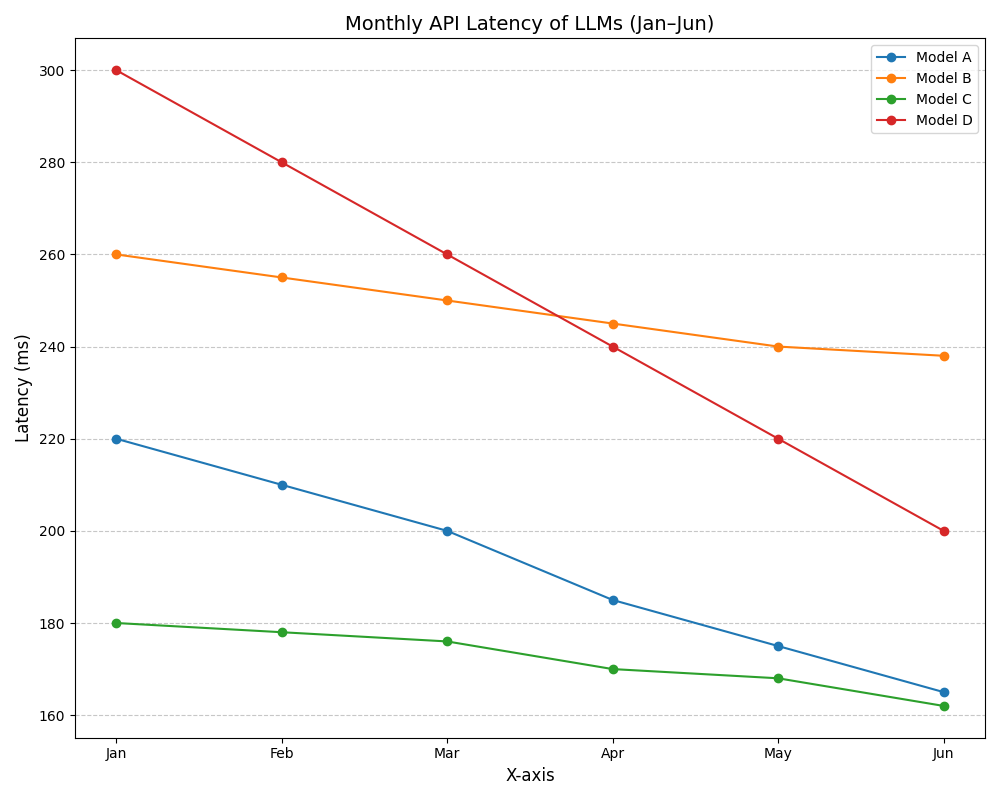


Question: Based on monthly API latency (ms) for four large language models over six months, which model shows the greatest overall decrease in latency from January to June?
A. Model A
B. Model B
C. Model C
D. Model D
Correct Answer: Model D
--------------------------------------------------------------------------------
question='Based on monthly API latency (ms) for four large language models over six months, which model shows the greatest overall decrease in latency from January to June?' answer='Model D' explanation='From January to June, Model D decreases from 300 ms to 200 ms (a 100 ms reduction), which is the greatest decrease compared to Model A (55 ms), Model B (22 ms), and Model C (18 ms).' options=['Model A', 'Model B', 'Model C', 'Model D'] graph_instruction=GraphInstruction(type='line', x_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], x_values=None, y_values=[[220, 210, 200, 185, 175, 165], [260, 255, 250, 245, 240, 238], [180, 178, 176, 170, 168, 162], [300, 280, 260,


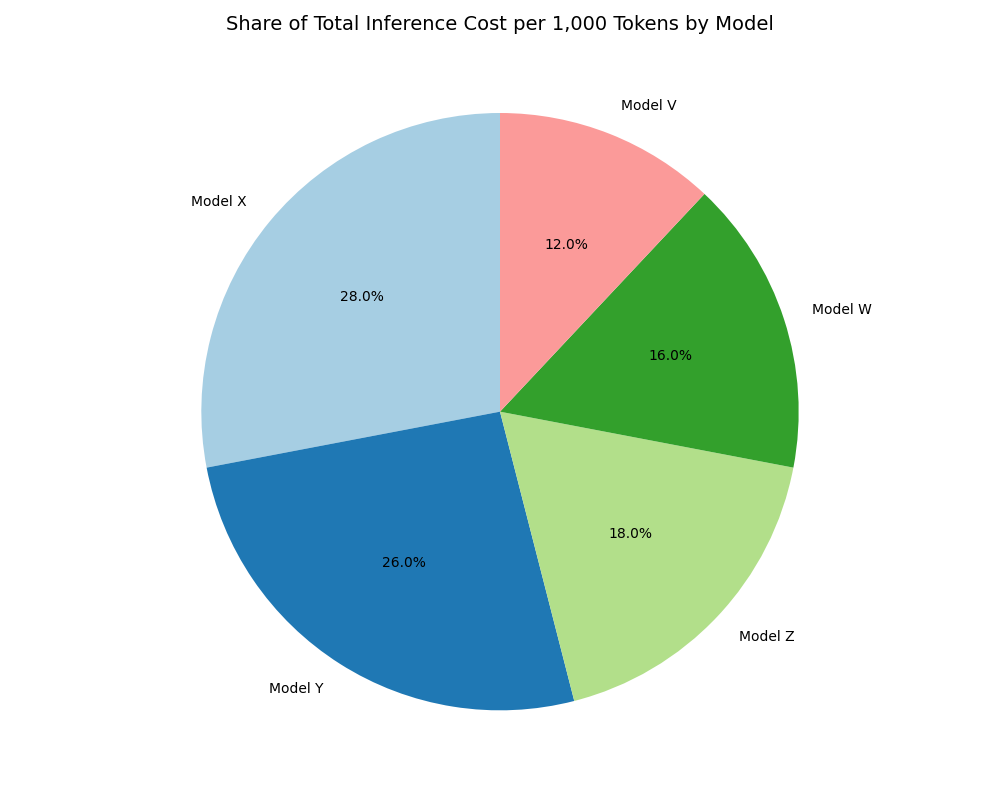


Question: In a distribution of inference cost per 1,000 tokens across five LLMs, which two models together account for more than half of the total cost share?
A. Model X and Model Y
B. Model X and Model Z
C. Model Y and Model W
D. Model V and Model W
Correct Answer: Model X and Model Y
--------------------------------------------------------------------------------
question='In a distribution of inference cost per 1,000 tokens across five LLMs, which two models together account for more than half of the total cost share?' answer='Model X and Model Y' explanation='Model X (28%) and Model Y (26%) sum to 54%, which is more than half of the total cost share.' options=['Model X and Model Y', 'Model X and Model Z', 'Model Y and Model W', 'Model V and Model W'] graph_instruction=GraphInstruction(type='pie', x_labels=None, x_values=None, y_values=None, labels=['Model X', 'Model Y', 'Model Z', 'Model W', 'Model V'], sizes=[28.0, 26.0, 18.0, 16.0, 12.0], y_label=None, title='Share of Total Infe

In [ ]:
ques = client.qna_engine.generate_visual_questions(
        topic="Large Language Models", num=2 )

print(ques.model_dump_json())